In [1]:
#Tutorial from http://www.ccnss.org/wp-content/uploads/2016/07/rlfit.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pavlovian_value(state,prev_val,reward,alpha=0.1):
    val=prev_val[state]+alpha*(reward-prev_val[state])
    prev_val[state]=val
    return prev_val
def instrumental_value(state,action,prev_q,reward,alpha=0.1):
    q=prev_q[state,action]+alpha*(reward-prev_q[state,action])
    prev_q[state,action]=q
    return prev_q
    

In [6]:
def generate_rewards_according_to_state_and_action(state,action):
    reward_lst=[0,-1,1]
    #0 is nogo, 1 is go
    actions_lst=[0,1]
    #Go to win
    if state==0 and action==1:
        reward=np.random.choice(reward_lst,1,p=[0.2,0,0.8])[0]
    if state==0 and action==0:
        reward=0
    #Nogo to win
    if state==1 and action==0:
        reward=np.random.choice(reward_lst,1,p=[0.2,0,0.8])[0]
    if state==1 and action==1:
        reward=0
    #Nogo to avoid loss
    if state==2 and action==0:
        reward=0
    if state==2 and action==1:
        reward=np.random.choice(reward_lst,1,p=[0.2,0.8,0])[0]
    #Go to avoid loss
    if state==3 and action==1:
        reward=0
    if state==3 and action==0:
        reward=np.random.choice(reward_lst,1,p=[0.2,0.8,0])[0]
    return reward

def action_e(state,pavlovian_value,instrumental_value,epsilon=0.1):
    e_lst=[]
    for a in range(0,2):
        if a==0:
            weight=instrumental_value[state,a]
            pr=np.e**weight
        elif a==1:
            weight=instrumental_value[state,a]+epsilon*pavlovian_value[state]
            pr=np.e**weight
        e_lst.append(pr)
    probability=e_lst/np.sum(e_lst)
    return probability
            
def generate_action(state,pavlovian_value,instrumental_value):
    probability=action_e(state,pavlovian_value,instrumental_value)
    action=np.random.choice([0,1],1,p=probability.flatten())[0]
    return action, probability[action]
    
def generate_state_and_reward(pavlovian_value,instrumental_value):
    states=[0,1,2,3]
    state=np.random.choice(states,1)[0]
    action,probability=generate_action(state,pavlovian_value,instrumental_value)
    reward=generate_rewards_according_to_state_and_action(state,action)
    return state,reward,action,probability
print(generate_rewards_according_to_state_and_action(0,1))

1


In [7]:
val_arr=np.zeros((4,))+0.01
q_arr=np.zeros((4,2))+0.01

print(q_arr)

[[0.01 0.01]
 [0.01 0.01]
 [0.01 0.01]
 [0.01 0.01]]


In [8]:
generate_state_and_reward(val_arr,q_arr)

(1, 1, 0, 0.49975000002083336)

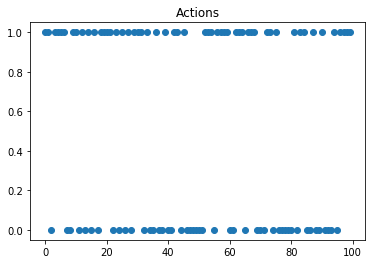

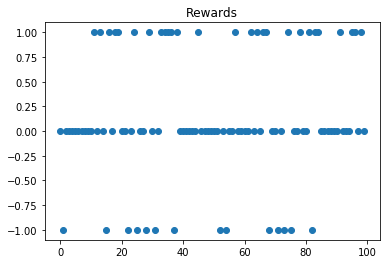

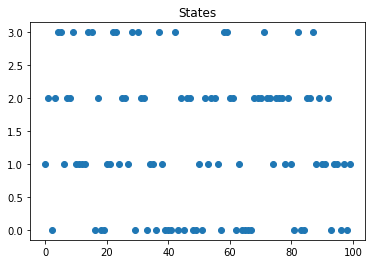

Reward sum: 13


In [11]:
def experiment():
    val_arr=np.zeros((4,))+0.01
    q_arr=np.zeros((4,2))+0.01
    reward_lst=[]
    state_lst=[]
    action_lst=[]
    probability_lst=[]
    for j in range(0,100):
        state,reward,action,probability=generate_state_and_reward(val_arr,q_arr)
        probability_lst.append(probability)
        reward_lst.append(reward)
        action_lst.append(action)
        state_lst.append(state)
        #print(state)
        val_arr=pavlovian_value(state,val_arr,reward,alpha=0.1)
        q_arr=instrumental_value(state,action,q_arr,reward,alpha=0.1)
        #print(q_arr)
    return val_arr, q_arr,reward_lst,action_lst,state_lst,probability_lst
    
val_arr, q_arr,reward_lst,action_lst,state_lst,probability_lst=experiment()

plt.plot(action_lst,'o')
plt.title('Actions')
plt.show()
plt.plot(reward_lst,'o')
plt.title('Rewards')
plt.show()
plt.plot(state_lst,'o')
plt.title('States')
plt.show()

print('Reward sum:',sum(reward_lst))

In [13]:
def calculate_likelihood(probability_lst):
    likelihood=np.log(np.prod(probability_lst))
    return likelihood

calculate_likelihood(probability_lst)

-65.44900744919013